# Exploratory Data Analisis

## Import Libraries & Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

ev_car_data = pd.read_csv("data/Electric_Car_Data.csv")
ev_car_data.head()

,Brand,Model,AvailableDate,BatteryCapacity(kWh),Price-Range(€/km),Acceleration (sec.),TopSpeed (km/h),Range (km),Efficiency (Wh/km),PowerTrain,Type,MarketSegment,NumOfSeats,HeatPump,TowingCapacity (kg),SafetyRating,PriceEuro
0,Tesla,Model 3,September 2023,57.5,108,6.1,201,415,139,Rear Wheel Drive,Sedan,D,5,Yes,1000.0,5.0,43970
1,Tesla,Model Y Long Range Dual Motor,February 2022,75.0,129,5.0,217,435,172,All Wheel Drive,SUV,D,5,Yes,1600.0,5.0,55970
2,Tesla,Model Y,November 2022,57.5,135,6.9,217,350,164,Rear Wheel Drive,SUV,D,5,Yes,1600.0,5.0,45970
3,BYD,ATTO 3,August 2022,60.5,121,7.3,160,330,183,Front Wheel Drive,SUV,C,5,Yes,NaN,5.0,37990
4,Tesla,Model Y Long Range RWD,April 2024,75.0,109,5.9,217,460,163,Rear Wheel Drive,SUV,D,5,Yes,1600.0,5.0,49970


## Data Description

In [2]:
# Dataset shape
print("Data count: ", ev_car_data.shape[0])
print("Attributes: ", ev_car_data.shape[1])

Data count:  318
Attributes:  17


In [3]:
# Attribute List
ev_car_data.dtypes

Brand                    object
Model                    object
AvailableDate            object
BatteryCapacity(kWh)    float64
Price-Range(€/km)         int64
Acceleration (sec.)     float64
TopSpeed (km/h)           int64
Range (km)                int64
Efficiency (Wh/km)        int64
PowerTrain               object
Type                     object
MarketSegment            object
NumOfSeats                int64
HeatPump                 object
TowingCapacity (kg)     float64
SafetyRating            float64
PriceEuro                 int64
dtype: object

### Attributes Description

* Brand
  - Attribute Type : Categorical - Nominal
  - Description : Car brand
* Model
  - Attribute Type : Categorical - Nominal
  - Description : Car model
* AvailableDate
  - Attribute Type : Categorical - Nominal
  - Description : Date of car availability
* BatteryCapacity
  - Attribute Type : Quantitative - Continue
  - Description : Maximum capacity of car battery
* Price-Range
  - Attribute Type : Quantitative - Continue
  - Description : Price-to-range ratio (PriceEuro/Range)
* Acceleration
  - Attribute Type : Quantitative - Continue
  - Description : Acceleration time for 0-100 km/h
* TopSpeed
  - Attribute Type : Quantitative - Continue
  - Description : Maximum car speed (km/h)
* Range
  - Attribute Type : Quantitative - Continue
  - Description : Maximum car range for one charge
* Efficiency
  - Attribute Type : Quantitative - Continue
  - Description : Electricity usage for each km travelled
* PowerTrain
  - Attribute Type : Categorical - Nominal
  - Description : Drive train of car
* Type
  - Attribute Type : Categorical - Nominal
  - Description : Car type
* MarketSegment
  - Attribute Type : Categorical - Nominal
  - Description : Market segment category of the car
* NumOfSeats
  - Attribute Type : Quantitative - Discrete
  - Description : Number of seats in car
* HeatPump
  - Attribute Type : Categorical - Binary
  - Description : Heat pump availability
* TowingCapacity
  - Attribute Type : Quantitative - Continue
  - Description : Maximum towing capacity of car
* SafetyRating
  - Attribute Type : Categorical - Ordinal
  - Description : Safety rating of car according to NCAP
* PriceEuro
  - Attribute Type : Quantitative - Continue
  - Description : Car price in Euro

#### Value Range

In [4]:
# Brand
for brand in sorted(ev_car_data["Brand"].unique()):
    print(brand, end=", ")

Abarth, Aiways, Audi, BMW, BYD, CUPRA, Citroen, DS, Dacia, Elaris, Fiat, Fisker, Ford, GWM, Genesis, Honda, Hongqi, Hyundai, Jaguar, Jeep, Kia, Lexus, Lotus, Lucid, MG, Maserati, Maxus, Mazda, Mercedes-Benz, Mini, NIO, Nissan, Opel, Peugeot, Polestar, Porsche, Renault, Rolls-Royce, Seres, Skoda, Smart, SsangYong, Subaru, Tesla, Toyota, VinFast, Volkswagen, Volvo, Voyah, XPENG, Zeekr, e.Go, 

In [5]:
# Numerical Attribute Basic Statistics
ev_car_data.describe()

,BatteryCapacity(kWh),Price-Range(€/km),Acceleration (sec.),TopSpeed (km/h),Range (km),Efficiency (Wh/km),NumOfSeats,TowingCapacity (kg),SafetyRating,PriceEuro
count,318.000000,318.000000,318.000000,318.000000,318.000000,318.000000,318.000000,217.000000,263.000000,318.000000
mean,74.690881,177.053459,6.480503,189.242138,395.330189,188.352201,5.091195,1337.465438,4.779468,69926.657233
std,20.742243,79.022141,2.441298,34.201129,96.406905,24.324862,0.655853,551.933915,0.651508,41148.730630
min,21.300000,90.000000,2.200000,125.000000,135.000000,139.000000,2.000000,0.000000,0.000000,22550.000000
25%,60.000000,130.000000,4.525000,160.000000,335.000000,170.000000,5.000000,750.000000,5.000000,45165.000000
50%,77.000000,152.500000,6.250000,180.000000,400.000000,185.000000,5.000000,1500.000000,5.000000,56725.000000
75%,90.600000,199.750000,7.900000,210.000000,465.000000,201.750000,5.000000,1800.000000,5.000000,81423.750000
max,118.000000,828.000000,19.100000,325.000000,665.000000,286.000000,8.000000,2500.000000,5.000000,379015.000000


In [6]:
# Power Train
for power_train in sorted(ev_car_data["PowerTrain"].unique()):
    print(power_train)

All Wheel Drive
Front Wheel Drive
Rear Wheel Drive


In [7]:
# Type
for car_type in sorted(ev_car_data["Type"].unique()):
    print(car_type)

Cabrio
Coupe
Hatchback
Liftback
SPV
SUV
Sedan
Station


In [8]:
# Market Segment
for ms in sorted(ev_car_data["MarketSegment"].unique()):
    print(ms)

A
B
C
D
E
F
N


In [9]:
# Heat Pump
for hp in sorted(ev_car_data["HeatPump"].unique()):
    print(hp)

No
Yes


## Data Quality

### Null Values

In [10]:
ev_car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318 entries, 0 to 317
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Brand                 318 non-null    object 
 1   Model                 318 non-null    object 
 2   AvailableDate         318 non-null    object 
 3   BatteryCapacity(kWh)  318 non-null    float64
 4   Price-Range(€/km)     318 non-null    int64  
 5   Acceleration (sec.)   318 non-null    float64
 6   TopSpeed (km/h)       318 non-null    int64  
 7   Range (km)            318 non-null    int64  
 8   Efficiency (Wh/km)    318 non-null    int64  
 9   PowerTrain            318 non-null    object 
 10  Type                  318 non-null    object 
 11  MarketSegment         318 non-null    object 
 12  NumOfSeats            318 non-null    int64  
 13  HeatPump              318 non-null    object 
 14  TowingCapacity (kg)   217 non-null    float64
 15  SafetyRating          2

In [11]:
# Check for null values
for column in ev_car_data.columns:
    if ev_car_data[column].isnull().any() :
        print(f"Attribute {column} has {ev_car_data[column].isna().sum()} missing values")

Attribute TowingCapacity (kg) has 101 missing values
Attribute SafetyRating has 55 missing values


### Attribute Type Mistakes

In [12]:
ev_car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318 entries, 0 to 317
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Brand                 318 non-null    object 
 1   Model                 318 non-null    object 
 2   AvailableDate         318 non-null    object 
 3   BatteryCapacity(kWh)  318 non-null    float64
 4   Price-Range(€/km)     318 non-null    int64  
 5   Acceleration (sec.)   318 non-null    float64
 6   TopSpeed (km/h)       318 non-null    int64  
 7   Range (km)            318 non-null    int64  
 8   Efficiency (Wh/km)    318 non-null    int64  
 9   PowerTrain            318 non-null    object 
 10  Type                  318 non-null    object 
 11  MarketSegment         318 non-null    object 
 12  NumOfSeats            318 non-null    int64  
 13  HeatPump              318 non-null    object 
 14  TowingCapacity (kg)   217 non-null    float64
 15  SafetyRating          2

- Safety Rating should be "int" because rating can only have a value of range 1-5  
- AvailableDate sshould be "datetime" because it is a date

## Data Exploration

In [13]:
# Average of price and safety rating for each brand
ev_car_data[["Brand","PriceEuro", "SafetyRating"]].groupby("Brand").mean().sort_values(by="PriceEuro", ascending=False)

,PriceEuro,SafetyRating
Brand,,
Rolls-Royce,379015.000000,NaN
Maserati,161256.500000,NaN
Porsche,149754.600000,5.000000
Lotus,125885.000000,NaN
Lucid,104333.333333,5.000000
Mercedes-Benz,92850.945946,5.000000
Jaguar,92400.000000,5.000000
BMW,85921.052632,4.812500
Hongqi,84328.333333,NaN


In [14]:
# Car with fast acceleration (< 5 sec.) and efficiency above 75% of other cars
result = ev_car_data[(ev_car_data["Efficiency (Wh/km)"] > ev_car_data["Efficiency (Wh/km)"].quantile(0.75)) & (ev_car_data["Acceleration (sec.)"] < 5)]
result

,Brand,Model,AvailableDate,BatteryCapacity(kWh),Price-Range(€/km),Acceleration (sec.),TopSpeed (km/h),Range (km),Efficiency (Wh/km),PowerTrain,Type,MarketSegment,NumOfSeats,HeatPump,TowingCapacity (kg),SafetyRating,PriceEuro
23,BYD,TANG,August 2022,86.4,199,4.6,180,355,243,All Wheel Drive,SUV,E,7,Yes,1500.0,5.0,71400
36,Rolls-Royce,Spectre,October 2023,102.0,828,4.5,250,465,219,All Wheel Drive,Coupe,F,4,Yes,NaN,NaN,379015
45,Hongqi,E-HS9 99 kWh,December 2022,90.0,216,4.9,200,370,243,All Wheel Drive,SUV,F,5,No,1500.0,NaN,79995
59,Hyundai,IONIQ 5 N,November 2023,80.0,194,3.4,260,385,208,All Wheel Drive,SUV,C,5,Yes,NaN,5.0,74900
64,BMW,iX xDrive50,November 2021,105.2,213,4.6,200,505,208,All Wheel Drive,SUV,E,5,Yes,2500.0,5.0,100100
66,Kia,EV6 GT,April 2022,74.0,198,3.5,260,360,206,All Wheel Drive,SUV,C,5,Yes,1800.0,5.0,72990
92,Lotus,Eletre,March 2023,109.0,202,4.5,250,495,220,All Wheel Drive,SUV,F,5,Yes,2250.0,NaN,96990
102,Fisker,Ocean Extreme,March 2023,106.5,124,3.9,205,520,205,All Wheel Drive,SUV,D,5,Yes,1820.0,NaN,63590
122,Tesla,Model X Plaid,November 2022,95.0,271,2.8,262,455,209,All Wheel Drive,SUV,F,7,Yes,2250.0,5.0,115970
125,Polestar,4 Long Range Dual Motor,January 2024,94.0,158,3.8,200,465,202,All Wheel Drive,Liftback,E,5,Yes,2000.0,NaN,71200


In [15]:
# Statistic of min, max, dan mean for car with Range 400 - 500 km
ev_car_data[(ev_car_data["Range (km)"] > 400) & (ev_car_data["Range (km)"] < 500)].describe()

,BatteryCapacity(kWh),Price-Range(€/km),Acceleration (sec.),TopSpeed (km/h),Range (km),Efficiency (Wh/km),NumOfSeats,TowingCapacity (kg),SafetyRating,PriceEuro
count,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,90.000000,96.000000,115.000000
mean,87.523478,196.634783,5.278261,207.208696,452.000000,193.521739,5.086957,1523.888889,4.968750,87589.095652
std,11.296284,108.284334,1.604587,31.432327,25.852144,21.617629,0.656482,512.387438,0.174906,51122.253574
min,57.500000,98.000000,2.200000,160.000000,405.000000,139.000000,2.000000,0.000000,4.000000,43970.000000
25%,77.000000,130.000000,3.900000,180.000000,430.000000,177.000000,5.000000,1200.000000,5.000000,54872.500000
50%,87.000000,159.000000,5.200000,200.000000,455.000000,193.000000,5.000000,1500.000000,5.000000,70800.000000
75%,95.500000,225.500000,6.550000,222.500000,475.000000,209.000000,5.000000,1950.000000,5.000000,99670.500000
max,118.000000,828.000000,9.600000,325.000000,495.000000,243.000000,7.000000,2500.000000,5.000000,379015.000000


### Data Visualizations

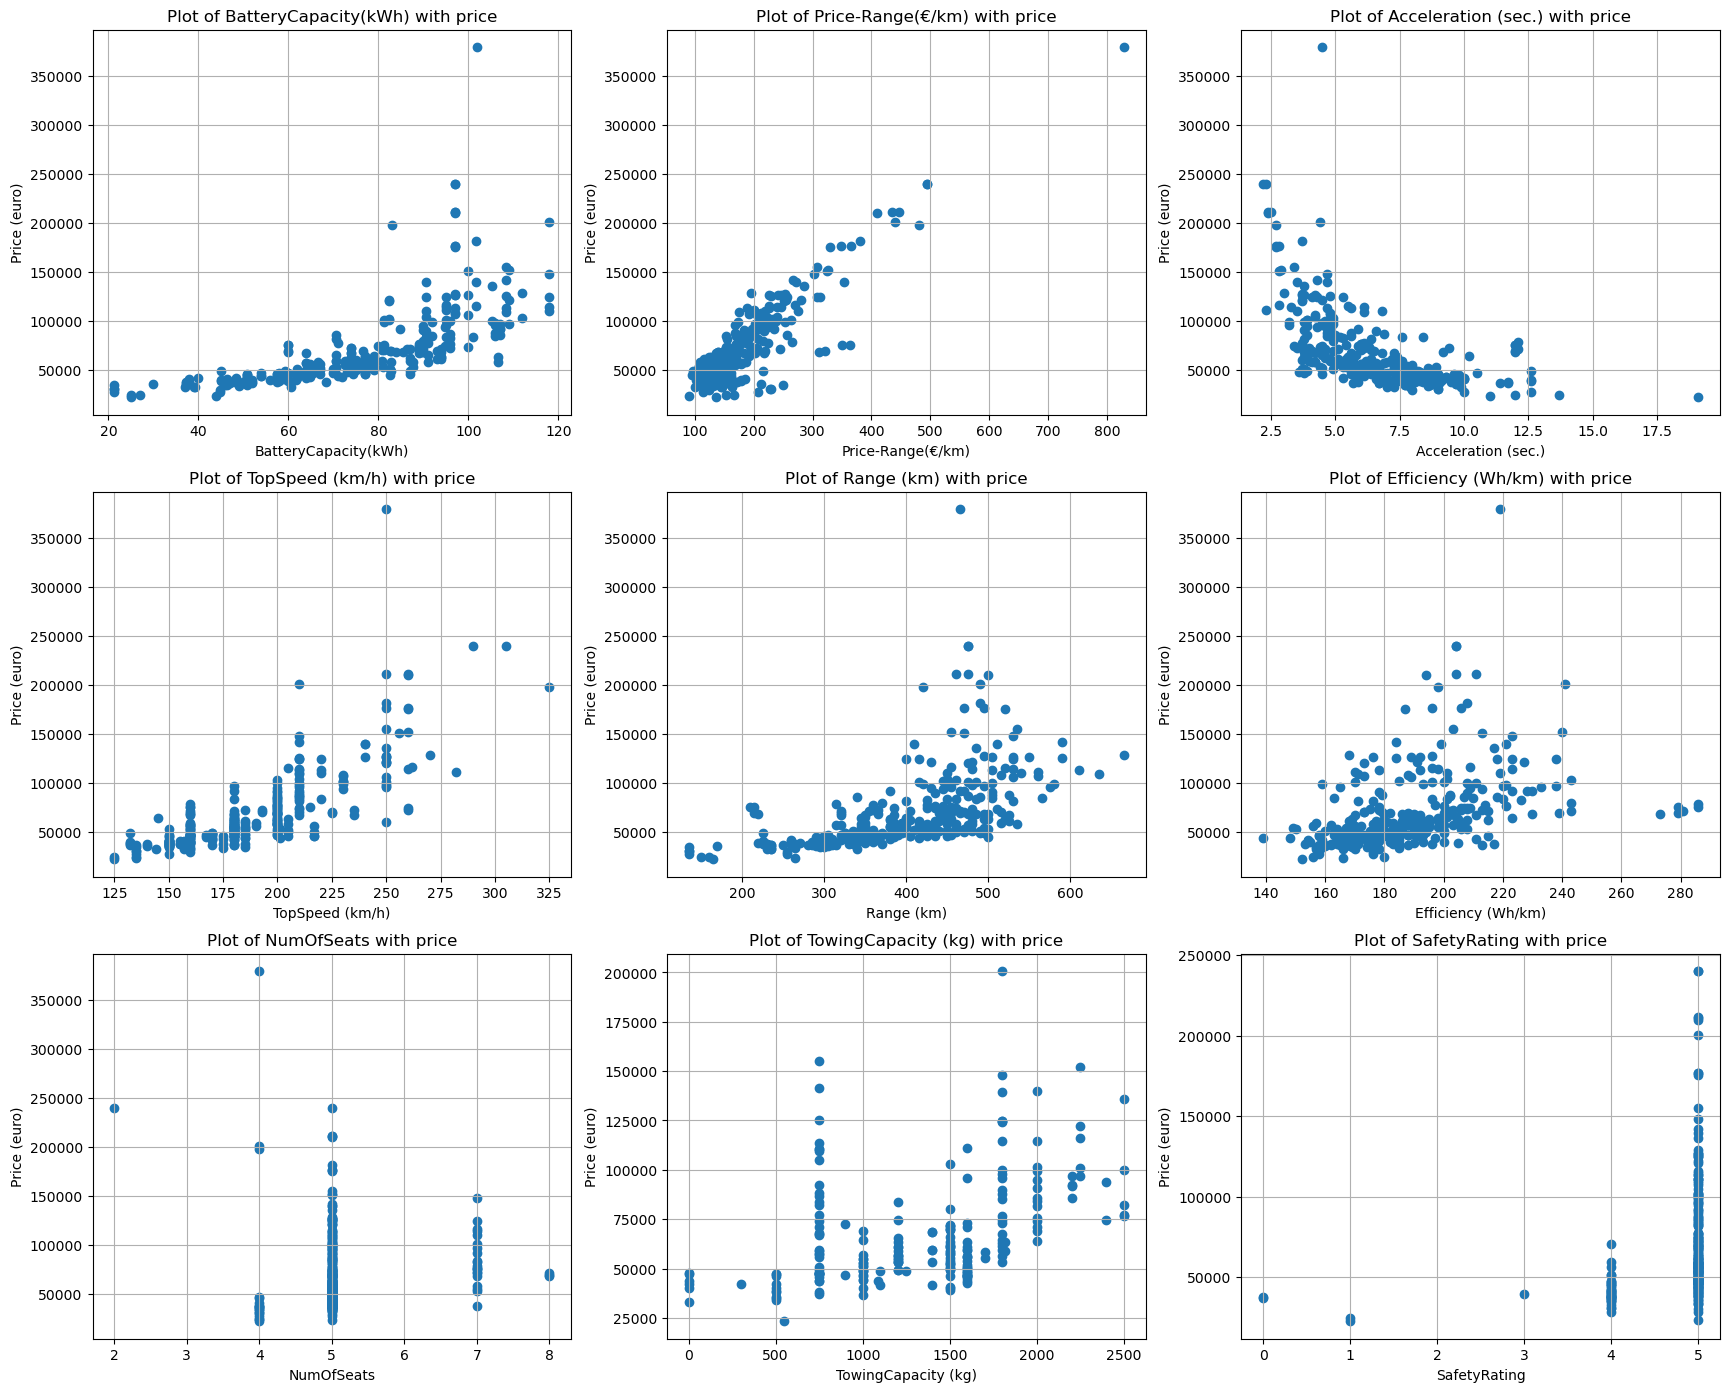

In [16]:
# Scatterplot of Numerical attributes with Car Prices
numerical_attributes = [col for col in ev_car_data.columns if (ev_car_data[col].dtypes in ["int64", "float64"])]
n_cols = 3
n_rows = int(np.ceil(len(numerical_attributes)/n_cols)) - 1
             
fig, axs = plt.subplots(nrows = n_rows, ncols = n_cols, figsize=(21,17))
for i, ax in enumerate(axs.flat):
    if i < len(numerical_attributes) - 1:
        col_name = numerical_attributes[i]
        ax.scatter(ev_car_data[col_name], ev_car_data["PriceEuro"])
        ax.set_title(f'Plot of {col_name} with price')
        ax.set_xlabel(col_name)
        ax.set_ylabel("Price (euro)")
        ax.grid(True)
    else:
        ax.axis('off')


#### Insights
- Attributes which have non-linear relationship with price: BatteryCapacity, Acceleration, Towing Capacity, Range
- Attributes which have linear relationship with harga : Price/Km, TopSpeed

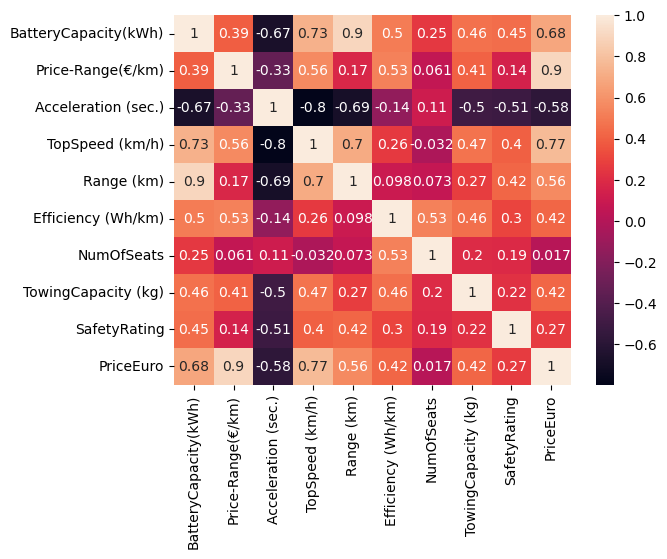

In [17]:
# Heatmap for numerical attribuets
sns.heatmap(ev_car_data[[column for column in ev_car_data.columns if ev_car_data[column].dtype in ['int64', 'float64']]].corr(),
           annot=True);

#### Insights
Attributes that are somewhat correlated with price: BatteryCapacity, Price-Range, Acceleration, TopSpeed, Range, Efficiency, dan Towing Capacity

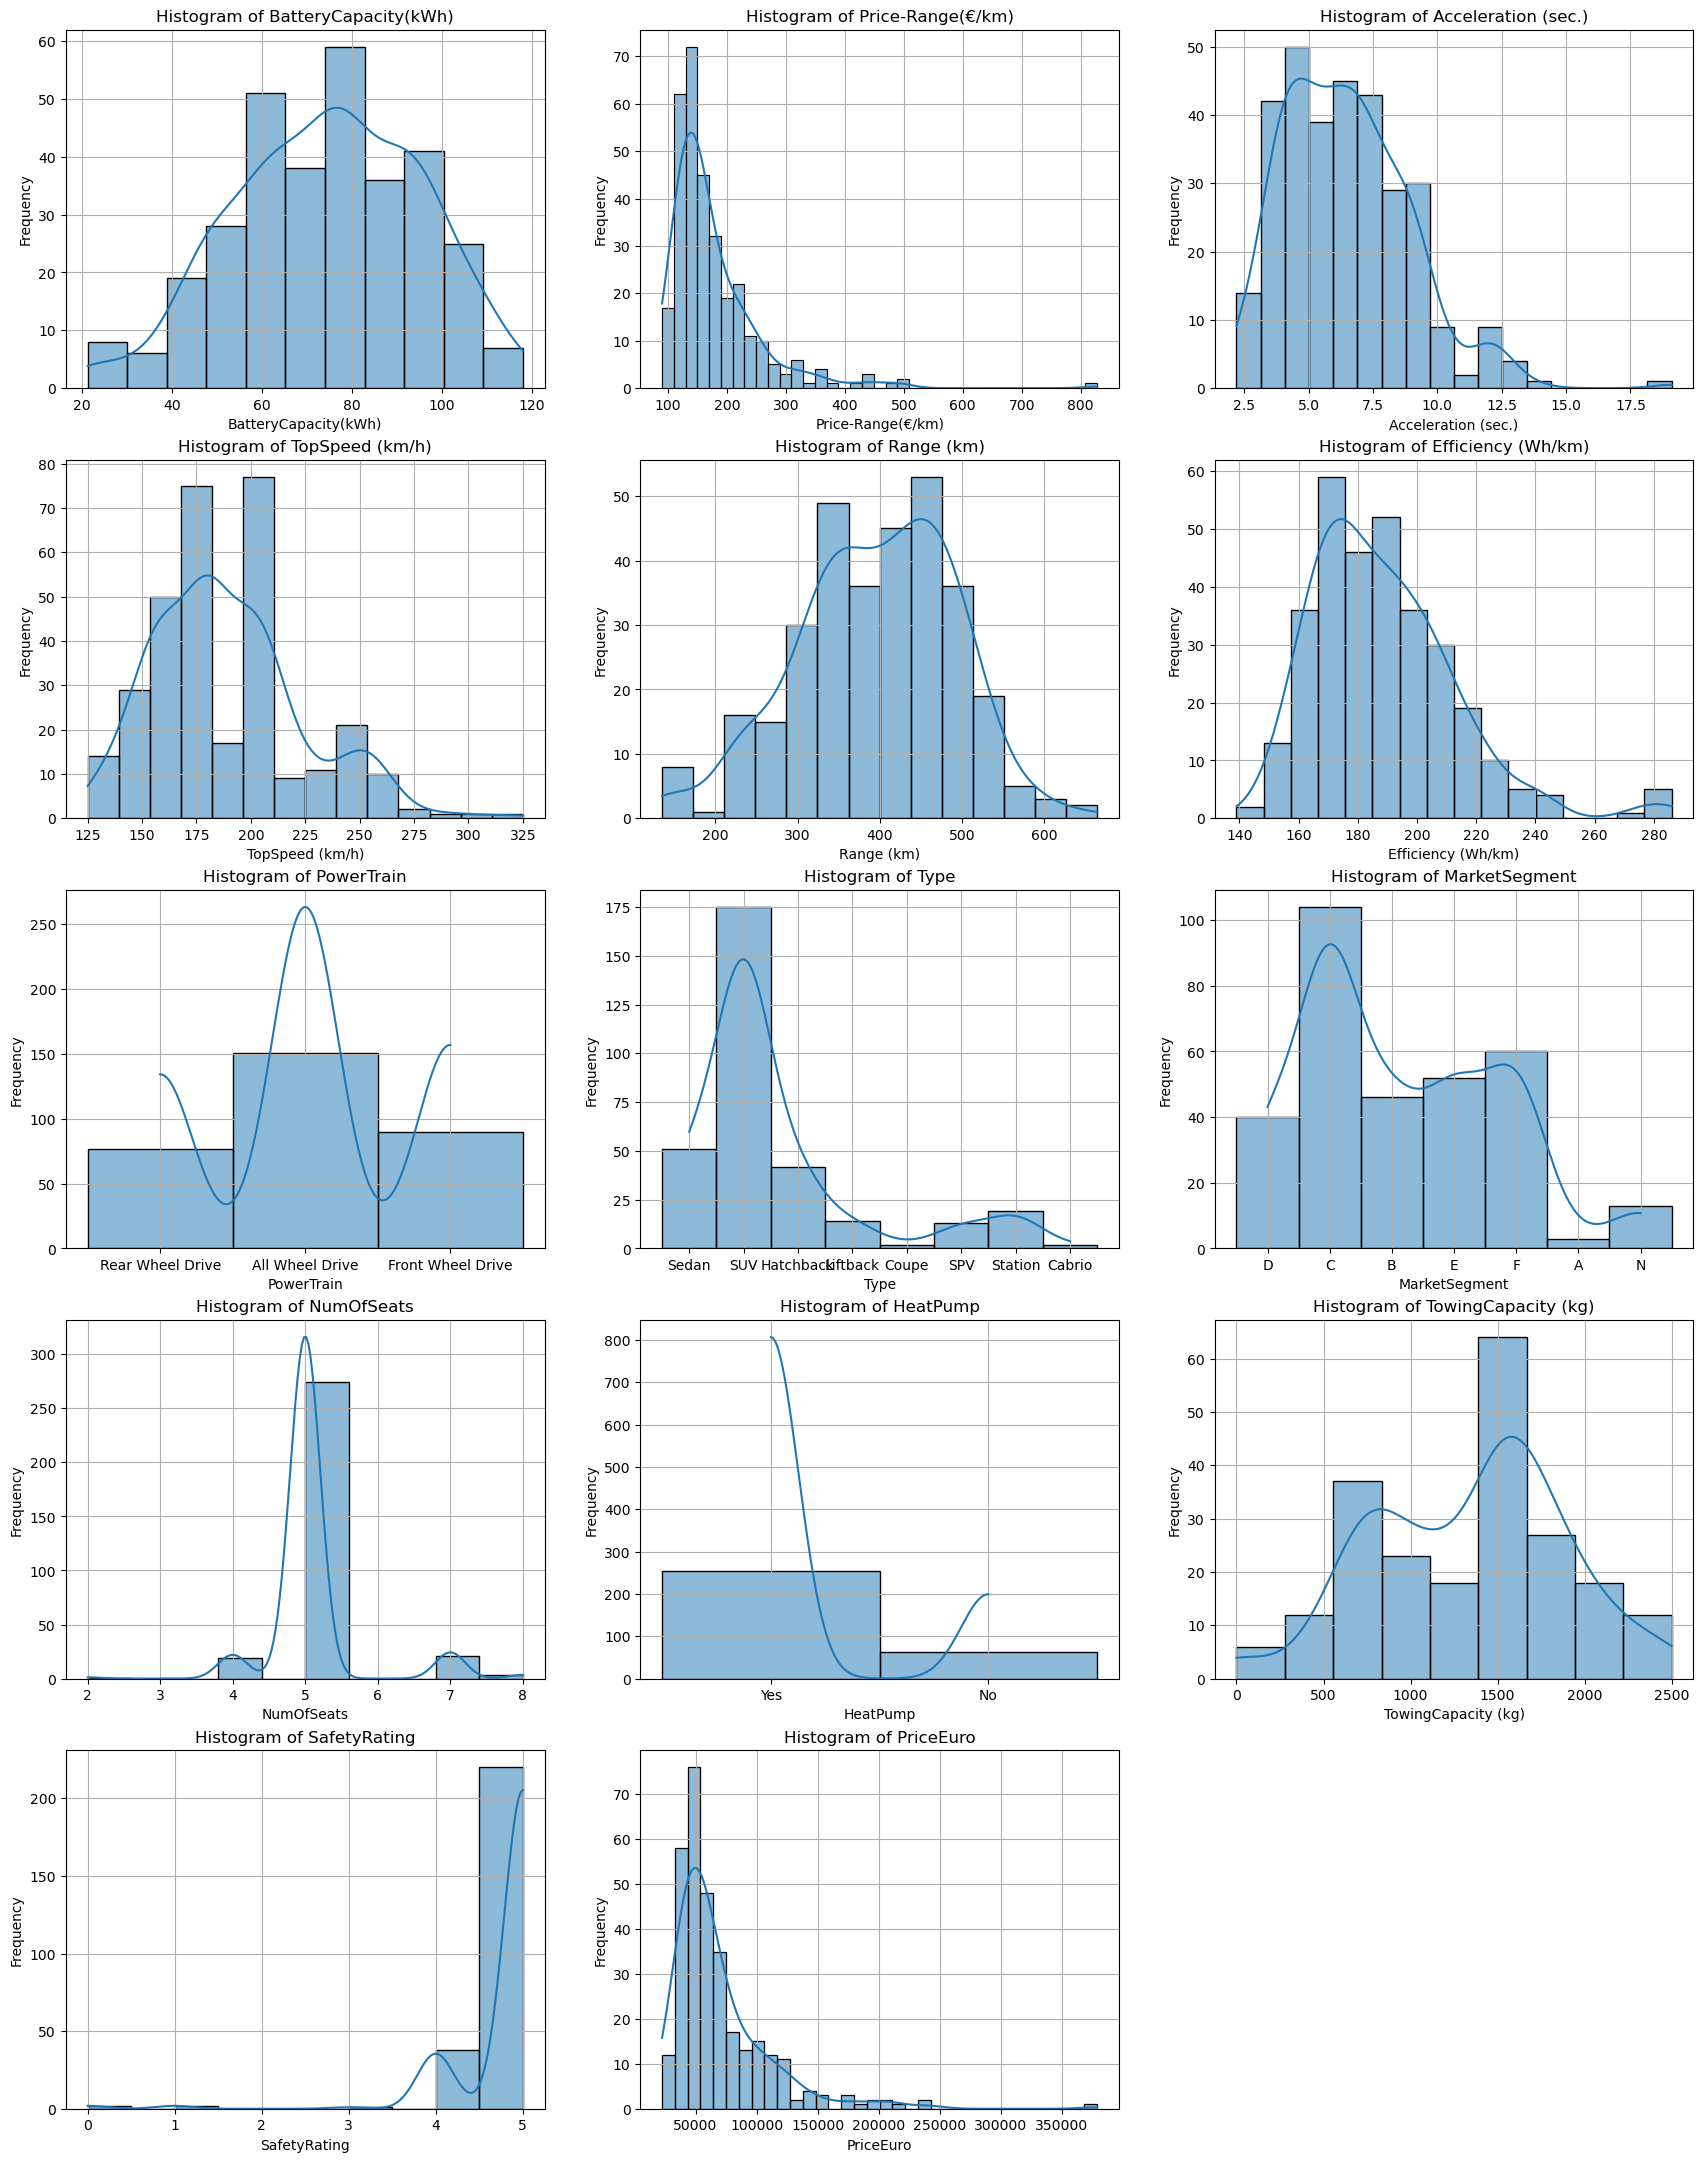

In [18]:
# Warning Suppression
import warnings
warnings.simplefilter("ignore", category=FutureWarning)

# Histogram for every attributes
hist_data = ev_car_data[ev_car_data.columns[3:]]
n_cols = 3
n_rows = int(np.ceil(len(hist_data.columns)/n_cols))

fig, axs = plt.subplots(nrows = n_rows, ncols = n_cols, figsize=(21,27))
for i, ax in enumerate(axs.flat):
    if i < len(hist_data.columns):
        col_name = hist_data.columns[i]
        sns.histplot(hist_data[col_name], kde=True, ax=ax)
        ax.set_title(f'Histogram of {col_name}')
        ax.set_xlabel(col_name)
        ax.set_ylabel('Frequency')
        ax.grid(True)
    else:
        ax.axis('off')

#### Insights
- Data close to normal distribution: BatteryCapacity, Range
- Data with skewed distribution: Price-Range, Acceleration
- Majority of cars are under 150000 Euro
- Majority of cars have 5 seats

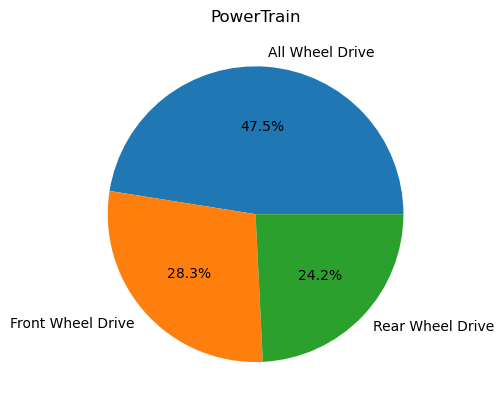

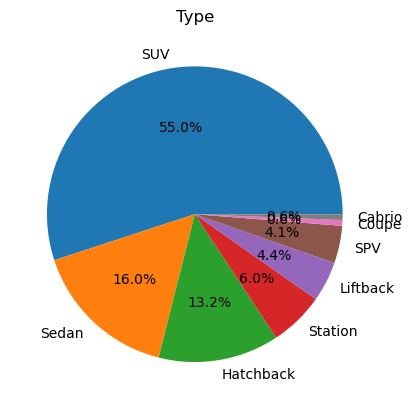

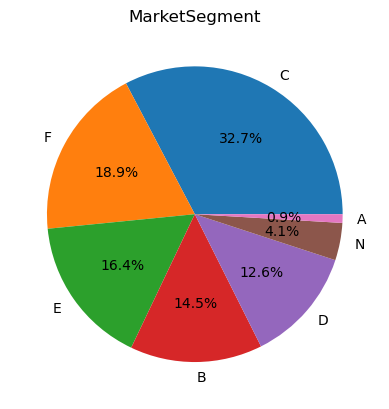

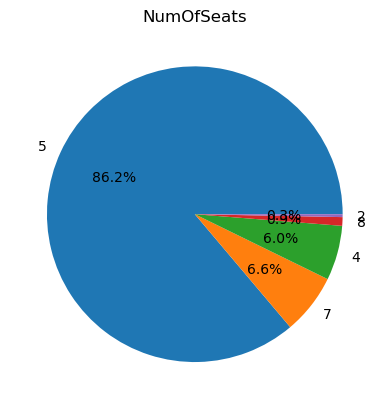

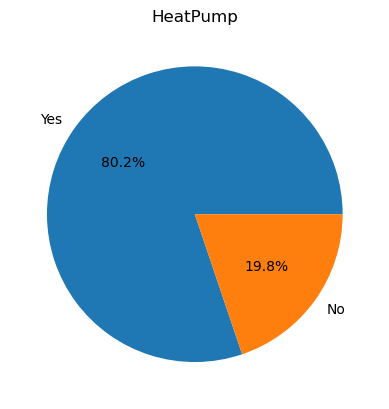

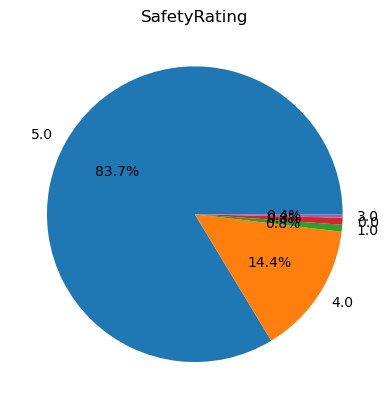

In [19]:
# Pie Chart for categorical attributes
category_cols = ["PowerTrain", "Type", "MarketSegment", "NumOfSeats", "HeatPump", "SafetyRating"]
for col in category_cols:
    data_show = ev_car_data[col].value_counts()
    plt.pie(data_show, labels=data_show.index, autopct='%1.1f%%')
    plt.title(f"{col}")
    plt.show()

#### Insights
- 47.5% cars have drive train of type All Wheel Drive
- 55% cars are of type  SUV
- 32.7% cars have a market segment of 'C'
- 86% cars have 5 seats
- 80% cars have heatpump
- 83% has a safety rating of 5

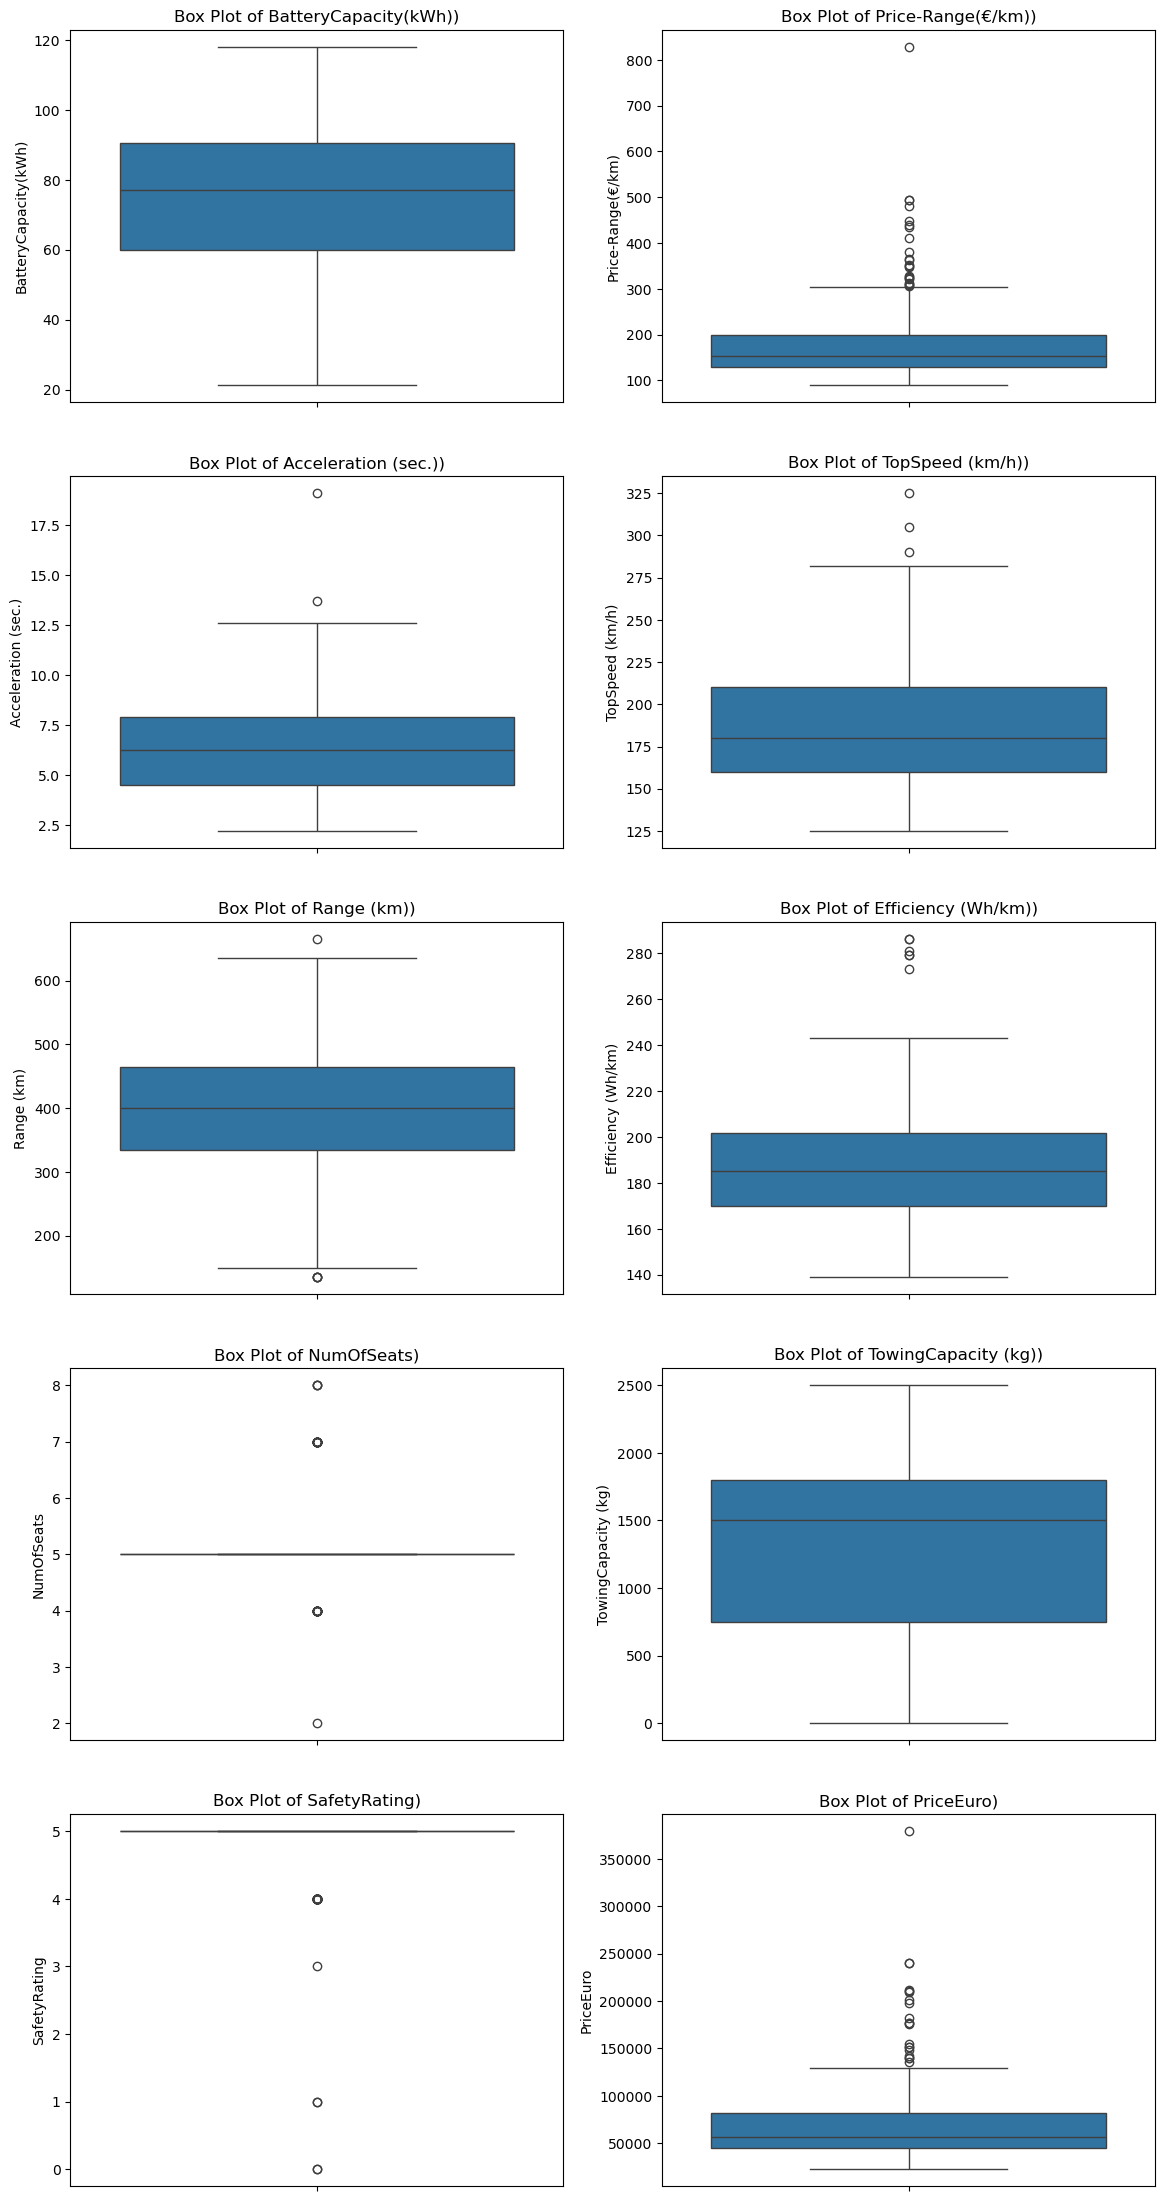

In [20]:
# Box Plot
fig, axs = plt.subplots(nrows= 5, ncols=2, figsize=(14, 28))
box_plot_columns = [col for col in ev_car_data.columns[3:] if ev_car_data[col].dtypes in ["int64", "float64"]]
for i, ax in enumerate(axs.flat):
    if i < len(box_plot_columns):
        sns.boxplot(data=ev_car_data[box_plot_columns[i]], ax=ax)
        ax.set_title(f"Box Plot of {box_plot_columns[i]})")
        ax.set_ylabel(f"{box_plot_columns[i]}")
    else :
        ax.axis('off')

#### Insights
- There are 1 outlier for car prices
- There are 4 data outlier for Efficiency
- There are 2 data outlier for Range
- There are 3 data outlier for TopSpeed
- There are 2 data outlier for Acceleration
- There are 1 data outlier for Price-Range

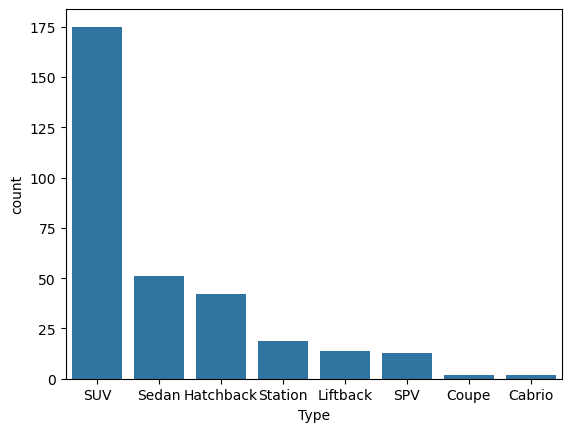

In [21]:
# Bar Chart for car types
value_counts_type = ev_car_data["Type"].value_counts()
sns.barplot(x=value_counts_type.index, y=value_counts_type)
plt.show()

# Data Preparation and Modelling

## Data Preparation

In [22]:
df = ev_car_data.copy(deep=True)
df.head(3)

,Brand,Model,AvailableDate,BatteryCapacity(kWh),Price-Range(€/km),Acceleration (sec.),TopSpeed (km/h),Range (km),Efficiency (Wh/km),PowerTrain,Type,MarketSegment,NumOfSeats,HeatPump,TowingCapacity (kg),SafetyRating,PriceEuro
0,Tesla,Model 3,September 2023,57.5,108,6.1,201,415,139,Rear Wheel Drive,Sedan,D,5,Yes,1000.0,5.0,43970
1,Tesla,Model Y Long Range Dual Motor,February 2022,75.0,129,5.0,217,435,172,All Wheel Drive,SUV,D,5,Yes,1600.0,5.0,55970
2,Tesla,Model Y,November 2022,57.5,135,6.9,217,350,164,Rear Wheel Drive,SUV,D,5,Yes,1600.0,5.0,45970


### Drop Outlier & Atribut that are not needed

In [23]:
# Drop Outlier
df[df["PriceEuro"] > 350000]

,Brand,Model,AvailableDate,BatteryCapacity(kWh),Price-Range(€/km),Acceleration (sec.),TopSpeed (km/h),Range (km),Efficiency (Wh/km),PowerTrain,Type,MarketSegment,NumOfSeats,HeatPump,TowingCapacity (kg),SafetyRating,PriceEuro
36,Rolls-Royce,Spectre,October 2023,102.0,828,4.5,250,465,219,All Wheel Drive,Coupe,F,4,Yes,NaN,NaN,379015


In [24]:
df = df.drop(df[df["PriceEuro"] > 350000].index)
df[df["PriceEuro"] > 350000]

,Brand,Model,AvailableDate,BatteryCapacity(kWh),Price-Range(€/km),Acceleration (sec.),TopSpeed (km/h),Range (km),Efficiency (Wh/km),PowerTrain,Type,MarketSegment,NumOfSeats,HeatPump,TowingCapacity (kg),SafetyRating,PriceEuro


In [25]:
# Drop Model column
df = df.drop(columns="Model")
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 317 entries, 0 to 317
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Brand                 317 non-null    object 
 1   AvailableDate         317 non-null    object 
 2   BatteryCapacity(kWh)  317 non-null    float64
 3   Price-Range(€/km)     317 non-null    int64  
 4   Acceleration (sec.)   317 non-null    float64
 5   TopSpeed (km/h)       317 non-null    int64  
 6   Range (km)            317 non-null    int64  
 7   Efficiency (Wh/km)    317 non-null    int64  
 8   PowerTrain            317 non-null    object 
 9   Type                  317 non-null    object 
 10  MarketSegment         317 non-null    object 
 11  NumOfSeats            317 non-null    int64  
 12  HeatPump              317 non-null    object 
 13  TowingCapacity (kg)   217 non-null    float64
 14  SafetyRating          263 non-null    float64
 15  PriceEuro             317 no

### Year and Month attributes based on AvailableDate

In [26]:
# Convert date to datetime
df["AvailableDate"] = pd.to_datetime(df["AvailableDate"], format="%B %Y")

In [27]:
# Year attribute
df["Year"] = df["AvailableDate"].dt.year

# Month attribute
df["Month"] = df["AvailableDate"].dt.month

# Drop AvailableDate column
df = df.drop(columns="AvailableDate")
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 317 entries, 0 to 317
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Brand                 317 non-null    object 
 1   BatteryCapacity(kWh)  317 non-null    float64
 2   Price-Range(€/km)     317 non-null    int64  
 3   Acceleration (sec.)   317 non-null    float64
 4   TopSpeed (km/h)       317 non-null    int64  
 5   Range (km)            317 non-null    int64  
 6   Efficiency (Wh/km)    317 non-null    int64  
 7   PowerTrain            317 non-null    object 
 8   Type                  317 non-null    object 
 9   MarketSegment         317 non-null    object 
 10  NumOfSeats            317 non-null    int64  
 11  HeatPump              317 non-null    object 
 12  TowingCapacity (kg)   217 non-null    float64
 13  SafetyRating          263 non-null    float64
 14  PriceEuro             317 non-null    int64  
 15  Year                  317 no

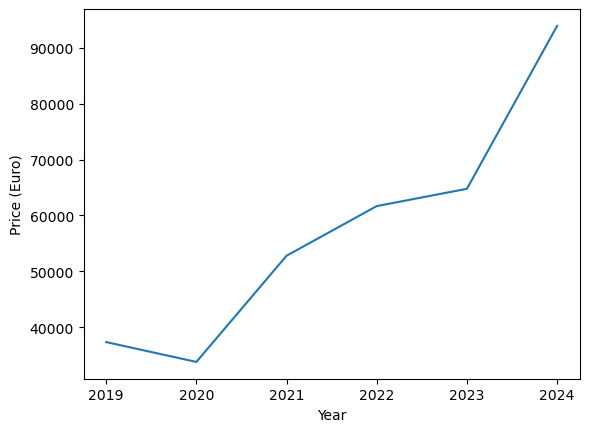

In [28]:
# Line Plot of average prices per year
plt.plot(df[["Year", "PriceEuro"]].groupby("Year").mean().index, df[["Year", "PriceEuro"]].groupby("Year").mean().values)
plt.xlabel("Year")
plt.ylabel("Price (Euro)")
plt.show()

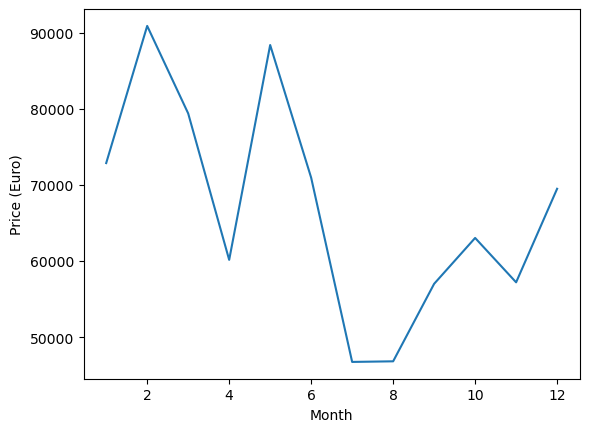

In [29]:
# Line Plot of average prices for each month
plt.plot(df[["Month", "PriceEuro"]].groupby("Month").mean().index, df[["Month", "PriceEuro"]].groupby("Month").mean().values)
plt.xlabel("Month")
plt.ylabel("Price (Euro)")
plt.show()

### Categorical Attribute to Numerical Attributes

In [30]:
# Column with string datatype
for label, content in df.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

Brand
PowerTrain
Type
MarketSegment
HeatPump


In [31]:
# Change those columns into categorical type
for label, content in df.items():
    if pd.api.types.is_string_dtype(content):
        df[label] = content.astype("category").cat.as_ordered()

In [32]:
# Encode values into numerical
for column in df.columns:
    if df[column].dtypes == "category":
        df[column] = df[column].cat.codes

df.head(3)

,Brand,BatteryCapacity(kWh),Price-Range(€/km),Acceleration (sec.),TopSpeed (km/h),Range (km),Efficiency (Wh/km),PowerTrain,Type,MarketSegment,NumOfSeats,HeatPump,TowingCapacity (kg),SafetyRating,PriceEuro,Year,Month
0,42,57.5,108,6.1,201,415,139,2,6,3,5,1,1000.0,5.0,43970,2023,9
1,42,75.0,129,5.0,217,435,172,0,5,3,5,1,1600.0,5.0,55970,2022,2
2,42,57.5,135,6.9,217,350,164,2,5,3,5,1,1600.0,5.0,45970,2022,11


### Fill Missing Values

Missing Values will be imputed with median for every round of cross validation using\
Pipeline

## Modelling

Data splits will use k-fold cross validation

Models: Lasso, Linear, Neural Network MLP Regressor, SVR with linear kernel, 
and RandomForestRegressor

Metrics: MAE, RMSE, dan R2-Score

In [33]:
np.random.seed(42)
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_validate, train_test_split
from sklearn.neural_network import MLPRegressor

scoring_metrics = ('neg_mean_absolute_error', 'neg_root_mean_squared_error', 'r2')

In [34]:
from sklearn.linear_model import Lasso, LinearRegression, LogisticRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

### Split data into training + validation set and test set

In [35]:
X = df.drop(columns="PriceEuro")
y = df["PriceEuro"]

X_train_and_val, X_test, y_train_and_val, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [36]:
X_train_and_val.info()

<class 'pandas.core.frame.DataFrame'>
Index: 253 entries, 210 to 103
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Brand                 253 non-null    int8   
 1   BatteryCapacity(kWh)  253 non-null    float64
 2   Price-Range(€/km)     253 non-null    int64  
 3   Acceleration (sec.)   253 non-null    float64
 4   TopSpeed (km/h)       253 non-null    int64  
 5   Range (km)            253 non-null    int64  
 6   Efficiency (Wh/km)    253 non-null    int64  
 7   PowerTrain            253 non-null    int8   
 8   Type                  253 non-null    int8   
 9   MarketSegment         253 non-null    int8   
 10  NumOfSeats            253 non-null    int64  
 11  HeatPump              253 non-null    int8   
 12  TowingCapacity (kg)   170 non-null    float64
 13  SafetyRating          210 non-null    float64
 14  Year                  253 non-null    int32  
 15  Month                 253 

### Pipeline

In [37]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

# Pipeline for imputation dan data normalization for every
# fold on k-fold cross-validation

def make_pipeline(model):
    numerical_columns = X_train_and_val.select_dtypes(include=["int", "float"]).columns.tolist()
    numerical_columns = [x for x in numerical_columns if x != "PriceEuro"]
    # Scaling values for numerical attributes only (not including target price column)
    # Impute only the columns which have missing values
    num_transformer = Pipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('scale', StandardScaler())
    ])
    
    ct = ColumnTransformer([
        ('num', num_transformer, numerical_columns)
    ], remainder='passthrough')
    
    pipeline = Pipeline([
        ('transformer', ct),
        ('model', model)
    ])

    return pipeline

### Baseline Model

In [38]:
def evaluate_baseline_model(model, model_name):
    scores = cross_validate(make_pipeline(model), X_train_and_val, y_train_and_val, 
                        scoring=scoring_metrics, cv=5, n_jobs=-1, )
    # Result
    data = {}
    data["model_name"] = model_name
    for score in scores:
        data[score] = scores[score].mean()
    return data

In [39]:
# baseline model performance
to_append = []
# Lasso Model
baseline_lasso = Lasso()
to_append.append(evaluate_baseline_model(baseline_lasso, "Baseline Lasso"))

# Linear Model
baseline_linear = LinearRegression()
to_append.append(evaluate_baseline_model(baseline_linear, "Baseline Linear"))

# MLP Regressor (Neural network)
baseline_mlp_reg = MLPRegressor(random_state=42)
to_append.append(evaluate_baseline_model(baseline_mlp_reg, "Baseline MLP Regressor"))

# SVR Linear kernel
baseline_svr = SVR(kernel='linear')
to_append.append(evaluate_baseline_model(baseline_svr, "Baseline Linear SVR"))

# Random Forest
baseline_rf = RandomForestRegressor(n_estimators=100, random_state=42)
to_append.append(evaluate_baseline_model(baseline_rf, "Baseline Random Forest"))

baseline = pd.DataFrame(to_append).sort_values(['test_neg_mean_absolute_error', 'test_neg_root_mean_squared_error', 'test_r2'], ascending=False)

### Model Tuning

Tuning will be done using GridSearchCV with 5-fold CV.\
Best parameters will be selected based on RMSE scores

In [40]:
from sklearn.model_selection import GridSearchCV

def print_grid_result(grid_object, model_name):
    print(f"Best Parameters for {model_name}: \n")
    print("Parameters: ", grid_object.best_params_)
    print("RMSE Value: ", grid_object.best_score_)

#### Lasso Model

In [41]:
# Tuning Hyperparameter
params_grid = {
    'model__alpha': [0.001, 0.01, 0.1, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0],
    'model__max_iter': [5000, 6000, 7000, 8000, 9000, 10000]
}

grid_search = GridSearchCV(make_pipeline(Lasso()), param_grid=params_grid, n_jobs=-1, cv=5,scoring='neg_root_mean_squared_error')
grid_search.fit(X_train_and_val, y_train_and_val)

print_grid_result(grid_search, "Lasso")

Best Parameters for Lasso: 

Parameters:  {'model__alpha': 3.0, 'model__max_iter': 5000}
RMSE Value:  -5621.604684203888


#### Linear Model

Linear model cannot be tuned

#### SVR Linear Kernel

In [42]:
params_grid = {
    'model__gamma': ['scale', 'auto'],
    'model__C': [3, 5, 10, 15, 20, 25, 30, 40, 50, 60, 70, 80, 90, 100],
    'model__epsilon': [0.001, 0.01, 0.05, 0.1, 0.2, 0.5, 1.0]
}

grid_search = GridSearchCV(make_pipeline(SVR(kernel='linear')), param_grid=params_grid, n_jobs=-1, 
                           cv=5,scoring='neg_root_mean_squared_error')
grid_search.fit(X_train_and_val, y_train_and_val)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scale',
                                                                                          StandardScaler())]),
                                                                         ['BatteryCapacity(kWh)',
                                                                          'Price-Range(€/km)',
                                                                          'Acceleration '
                                                                          '(sec.)',
                                                                          'TopSpeed '
                                                                          '(km/h)',
                                                                          'Range '
                                                                          '(km)',
                                                                          'Efficiency '
                                                                          '(Wh/km)',
                                                                          'NumOfSeats',
                                                                          'TowingCapacity '
                                                                          '(kg)',
                                                                          'SafetyRating',
                                                                          'Year',
                                                                          'Month'])])),
                                       ('model', SVR(kernel='linear'))]),
             n_jobs=-1,
             param_grid={'model__C': [3, 5, 10, 15, 20, 25, 30, 40, 50, 60, 70,
                                      80, 90, 100],
                         'model__epsilon': [0.001, 0.01, 0.05, 0.1, 0.2, 0.5,
                                            1.0],
                         'model__gamma': ['scale', 'auto']},
             scoring='neg_root_mean_squared_error')

In [43]:
print_grid_result(grid_search, "Linear SVR")

Best Parameters for Linear SVR: 

Parameters:  {'model__C': 100, 'model__epsilon': 1.0, 'model__gamma': 'scale'}
RMSE Value:  -16488.128102489256


#### Random Forest

In [44]:
# N Estimators search
grid_search = GridSearchCV(make_pipeline(RandomForestRegressor(n_jobs=-1, random_state=42)), param_grid={"model__n_estimators" : [50, 100, 200, 500, 750, 1000, 1200, 1500, 2000]}, n_jobs=-1, 
                           cv=5,scoring='neg_root_mean_squared_error', verbose=4)
grid_search.fit(X_train_and_val, y_train_and_val)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scale',
                                                                                          StandardScaler())]),
                                                                         ['BatteryCapacity(kWh)',
                                                                          'Price-Range(€/km)',
                                                                          'Acceleration '
                                                                          '(sec.)',
                                                                          'TopSpeed '
                                                                          '(km/h)',
                                                                          'Range '
                                                                          '(km)',
                                                                          'Efficiency '
                                                                          '(Wh/km)',
                                                                          'NumOfSeats',
                                                                          'TowingCapacity '
                                                                          '(kg)',
                                                                          'SafetyRating',
                                                                          'Year',
                                                                          'Month'])])),
                                       ('model',
                                        RandomForestRegressor(n_jobs=-1,
                                                              random_state=42))]),
             n_jobs=-1,
             param_grid={'model__n_estimators': [50, 100, 200, 500, 750, 1000,
                                                 1200, 1500, 2000]},
             scoring='neg_root_mean_squared_error', verbose=4)

In [45]:
print_grid_result(grid_search, "Random Forest Regressor")

Best Parameters for Random Forest Regressor: 

Parameters:  {'model__n_estimators': 500}
RMSE Value:  -6508.41889251714


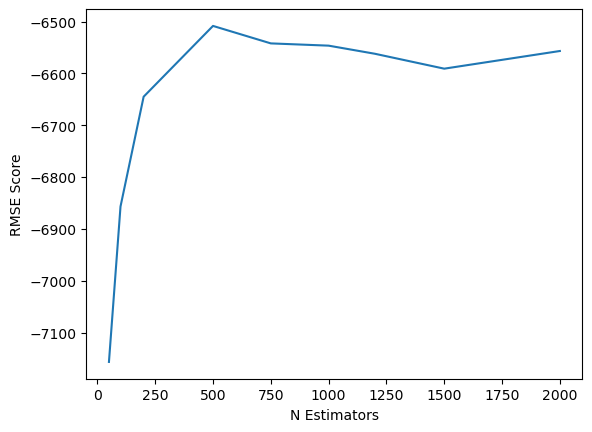

In [46]:
n_est = [i['model__n_estimators'] for i in grid_search.cv_results_['params']]
rmse_scores = [i for i in grid_search.cv_results_['mean_test_score']] # Higher is better
plt.plot(n_est, rmse_scores)
plt.xlabel("N Estimators")
plt.ylabel("RMSE Score")
plt.show()

It can be seen that best number of n_estimators is around 500

In [47]:
# Grid search for best n_est around 500
grid_search = GridSearchCV(make_pipeline(RandomForestRegressor(n_jobs=-1, random_state=42)), param_grid={"model__n_estimators" : [300 + 50*i for i in range(11)]}, n_jobs=-1, 
                           cv=5,scoring='neg_root_mean_squared_error', verbose=4)
grid_search.fit(X_train_and_val, y_train_and_val)

Fitting 5 folds for each of 11 candidates, totalling 55 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scale',
                                                                                          StandardScaler())]),
                                                                         ['BatteryCapacity(kWh)',
                                                                          'Price-Range(€/km)',
                                                                          'Acceleration '
                                                                          '(sec.)',
                                                                          'TopSpeed '
                                                                          '(km/h)',
                                                                          'Range '
                                                                          '(km)',
                                                                          'Efficiency '
                                                                          '(Wh/km)',
                                                                          'NumOfSeats',
                                                                          'TowingCapacity '
                                                                          '(kg)',
                                                                          'SafetyRating',
                                                                          'Year',
                                                                          'Month'])])),
                                       ('model',
                                        RandomForestRegressor(n_jobs=-1,
                                                              random_state=42))]),
             n_jobs=-1,
             param_grid={'model__n_estimators': [300, 350, 400, 450, 500, 550,
                                                 600, 650, 700, 750, 800]},
             scoring='neg_root_mean_squared_error', verbose=4)

Best Parameters for Random Forest Regressor: 

Parameters:  {'model__n_estimators': 450}
RMSE Value:  -6470.067548367352


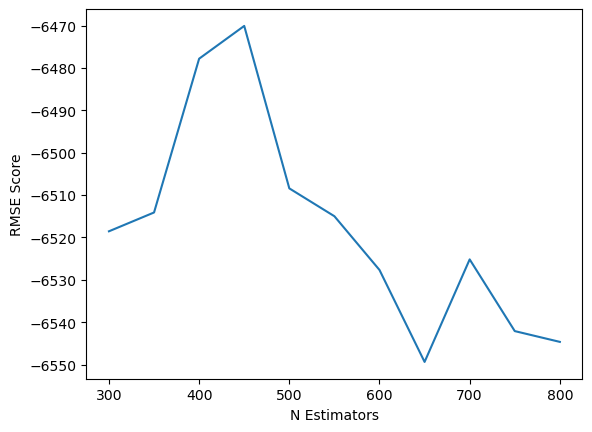

In [48]:
print_grid_result(grid_search, "Random Forest Regressor")
n_est = [i['model__n_estimators'] for i in grid_search.cv_results_['params']]
rmse_scores = [i for i in grid_search.cv_results_['mean_test_score']] # Higher is better
plt.plot(n_est, rmse_scores)
plt.xlabel("N Estimators")
plt.ylabel("RMSE Score")
plt.show()

It can be seen that best n_estimators is around 450

In [49]:
# Grid search to find best n_est around 450
grid_search = GridSearchCV(make_pipeline(RandomForestRegressor(n_jobs=-1, random_state=42)), param_grid={"model__n_estimators" : [
    300 + 10*i for i in range(21)
]}, n_jobs=-1, 
                           cv=5,scoring='neg_root_mean_squared_error', verbose=4)
grid_search.fit(X_train_and_val, y_train_and_val)

Fitting 5 folds for each of 21 candidates, totalling 105 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scale',
                                                                                          StandardScaler())]),
                                                                         ['BatteryCapacity(kWh)',
                                                                          'Price-Range(€/km)',
                                                                          'Acceleration '
                                                                          '(sec.)',
                                                                          'TopSpeed '
                                                                          '(km/h)',
                                                                          'Range '
                                                                          '(km)',
                                                                          'Efficiency '
                                                                          '(Wh/km)',
                                                                          'NumOfSeats',
                                                                          'TowingCapacity '
                                                                          '(kg)',
                                                                          'SafetyRating',
                                                                          'Year',
                                                                          'Month'])])),
                                       ('model',
                                        RandomForestRegressor(n_jobs=-1,
                                                              random_state=42))]),
             n_jobs=-1,
             param_grid={'model__n_estimators': [300, 310, 320, 330, 340, 350,
                                                 360, 370, 380, 390, 400, 410,
                                                 420, 430, 440, 450, 460, 470,
                                                 480, 490, 500]},
             scoring='neg_root_mean_squared_error', verbose=4)

Best Parameters for Random Forest Regressor: 

Parameters:  {'model__n_estimators': 460}
RMSE Value:  -6466.031532628415


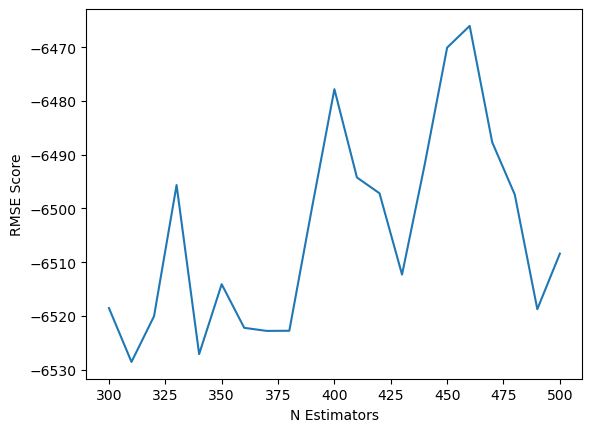

In [50]:
print_grid_result(grid_search, "Random Forest Regressor")
n_est = [i['model__n_estimators'] for i in grid_search.cv_results_['params']]
rmse_scores = [i for i in grid_search.cv_results_['mean_test_score']] # Higher is better
plt.plot(n_est, rmse_scores)
plt.xlabel("N Estimators")
plt.ylabel("RMSE Score")
plt.show()

Best n_estimators is 460

In [51]:
# Grid search for other hyperparameters
params_grid = {
    'model__min_samples_leaf': [1, 2, 3],
    "model__min_samples_split": [2, 3],
    "model__max_features": [0.2, 0.5, 1.0],
    "model__max_leaf_nodes": [None, 20, 50, 100]
}
grid_search = GridSearchCV(make_pipeline(RandomForestRegressor(n_estimators=460,n_jobs=-1, random_state=42)),
                           param_grid=params_grid, n_jobs=-1, 
                           cv=5,scoring='neg_root_mean_squared_error', verbose=4)
grid_search.fit(X_train_and_val, y_train_and_val)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scale',
                                                                                          StandardScaler())]),
                                                                         ['BatteryCapacity(kWh)',
                                                                          'Price-Range(€/km)',
                                                                          'Acceleration '
                                                                          '(sec.)',
                                                                          'TopSpeed '
                                                                          '(km/h)',
                                                                          'Range '
                                                                          '(km)',
                                                                          'Efficiency '
                                                                          '(Wh/km)',
                                                                          'NumOfSeats',
                                                                          'TowingCapacity '
                                                                          '(kg)',
                                                                          'SafetyRating',
                                                                          'Year',
                                                                          'Month'])])),
                                       ('model',
                                        RandomForestRegressor(n_estimators=460,
                                                              n_jobs=-1,
                                                              random_state=42))]),
             n_jobs=-1,
             param_grid={'model__max_features': [0.2, 0.5, 1.0],
                         'model__max_leaf_nodes': [None, 20, 50, 100],
                         'model__min_samples_leaf': [1, 2, 3],
                         'model__min_samples_split': [2, 3]},
             scoring='neg_root_mean_squared_error', verbose=4)

In [52]:
print_grid_result(grid_search, "Random Forest Regressor")

Best Parameters for Random Forest Regressor: 

Parameters:  {'model__max_features': 1.0, 'model__max_leaf_nodes': 100, 'model__min_samples_leaf': 1, 'model__min_samples_split': 2}
RMSE Value:  -6424.476026035503


#### ANN (MLP Regressor)

In [53]:
params_grid = {
    "model__hidden_layer_sizes" : [(1,), (10,), (20,), (40,)],
    "model__activation" : ['relu', 'tanh', 'identity'], 
    "model__alpha": [0.0001, 0.0005, 0.001, 0.01],
    "model__early_stopping": [False, True]
}

grid_search = GridSearchCV(make_pipeline(MLPRegressor(max_iter=10000, solver='lbfgs', random_state=42)), param_grid=params_grid, n_jobs=-1, 
                           cv=5,scoring='neg_root_mean_squared_error', verbose=4)
grid_search.fit(X_train_and_val, y_train_and_val)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scale',
                                                                                          StandardScaler())]),
                                                                         ['BatteryCapacity(kWh)',
                                                                          'Price-Range(€/km)',
                                                                          'Acceleration '
                                                                          '(sec.)',
                                                                          'TopSpeed '
                                                                          '(km/h)',
                                                                          'Range '
                                                                          '(km)',
                                                                          'Efficiency '
                                                                          '(Wh/km)',
                                                                          'NumOfSeats',
                                                                          'To...
                                                                          'SafetyRating',
                                                                          'Year',
                                                                          'Month'])])),
                                       ('model',
                                        MLPRegressor(max_iter=10000,
                                                     random_state=42,
                                                     solver='lbfgs'))]),
             n_jobs=-1,
             param_grid={'model__activation': ['relu', 'tanh', 'identity'],
                         'model__alpha': [0.0001, 0.0005, 0.001, 0.01],
                         'model__early_stopping': [False, True],
                         'model__hidden_layer_sizes': [(1,), (10,), (20,),
                                                       (40,)]},
             scoring='neg_root_mean_squared_error', verbose=4)

In [54]:
print_grid_result(grid_search, "MLP Regressor")

Best Parameters for MLP Regressor: 

Parameters:  {'model__activation': 'relu', 'model__alpha': 0.0001, 'model__early_stopping': False, 'model__hidden_layer_sizes': (10,)}
RMSE Value:  -3949.5515206510963


It can be seen that the optimal amount of hidden layer is around 10

In [55]:
# Grid search around 10 layer
params_grid = {
    "model__hidden_layer_sizes" : [(5,), (6,), (7,), (8,), (9,), (10,), (11,), (12,), (13,), (14,), (15,)],
    "model__activation" : ['relu', 'tanh', 'identity'], 
    "model__alpha": [0.0001, 0.001, 0.01],
    "model__early_stopping": [False, True]
}

grid_search = GridSearchCV(make_pipeline(MLPRegressor(max_iter=10000, solver='lbfgs', random_state=42)), param_grid=params_grid, n_jobs=-1, 
                           cv=5,scoring='neg_root_mean_squared_error')
grid_search.fit(X_train_and_val, y_train_and_val)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scale',
                                                                                          StandardScaler())]),
                                                                         ['BatteryCapacity(kWh)',
                                                                          'Price-Range(€/km)',
                                                                          'Acceleration '
                                                                          '(sec.)',
                                                                          'TopSpeed '
                                                                          '(km/h)',
                                                                          'Range '
                                                                          '(km)',
                                                                          'Efficiency '
                                                                          '(Wh/km)',
                                                                          'NumOfSeats',
                                                                          'To...
                                                                          'Month'])])),
                                       ('model',
                                        MLPRegressor(max_iter=10000,
                                                     random_state=42,
                                                     solver='lbfgs'))]),
             n_jobs=-1,
             param_grid={'model__activation': ['relu', 'tanh', 'identity'],
                         'model__alpha': [0.0001, 0.001, 0.01],
                         'model__early_stopping': [False, True],
                         'model__hidden_layer_sizes': [(5,), (6,), (7,), (8,),
                                                       (9,), (10,), (11,),
                                                       (12,), (13,), (14,),
                                                       (15,)]},
             scoring='neg_root_mean_squared_error')

In [56]:
print_grid_result(grid_search, "MLP Regressor")

Best Parameters for MLP Regressor: 

Parameters:  {'model__activation': 'relu', 'model__alpha': 0.01, 'model__early_stopping': False, 'model__hidden_layer_sizes': (6,)}
RMSE Value:  -3856.358811481222


6 layer is the optimal number of node in first hidden layers

In [57]:
# Grid search for potential second hidden layers
params_grid = {
    "model__hidden_layer_sizes" : [(5,1), (6,1), (5,2), (6,2), (7,1), (7,2), (5,), (6,), (7,), (6,3), (6,4)],
    "model__activation" : ['relu', 'tanh', 'identity'], 
    "model__alpha": [0.0001, 0.001, 0.01],
    "model__early_stopping": [False, True]
}

grid_search = GridSearchCV(make_pipeline(MLPRegressor(max_iter=10000, solver='lbfgs', random_state=42)), param_grid=params_grid, n_jobs=-1, 
                           cv=5,scoring='neg_root_mean_squared_error')
grid_search.fit(X_train_and_val, y_train_and_val)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scale',
                                                                                          StandardScaler())]),
                                                                         ['BatteryCapacity(kWh)',
                                                                          'Price-Range(€/km)',
                                                                          'Acceleration '
                                                                          '(sec.)',
                                                                          'TopSpeed '
                                                                          '(km/h)',
                                                                          'Range '
                                                                          '(km)',
                                                                          'Efficiency '
                                                                          '(Wh/km)',
                                                                          'NumOfSeats',
                                                                          'To...
                                                                          'Month'])])),
                                       ('model',
                                        MLPRegressor(max_iter=10000,
                                                     random_state=42,
                                                     solver='lbfgs'))]),
             n_jobs=-1,
             param_grid={'model__activation': ['relu', 'tanh', 'identity'],
                         'model__alpha': [0.0001, 0.001, 0.01],
                         'model__early_stopping': [False, True],
                         'model__hidden_layer_sizes': [(5, 1), (6, 1), (5, 2),
                                                       (6, 2), (7, 1), (7, 2),
                                                       (5,), (6,), (7,), (6, 3),
                                                       (6, 4)]},
             scoring='neg_root_mean_squared_error')

In [58]:
print_grid_result(grid_search, "MLP Regressor")

Best Parameters for MLP Regressor: 

Parameters:  {'model__activation': 'relu', 'model__alpha': 0.01, 'model__early_stopping': False, 'model__hidden_layer_sizes': (6,)}
RMSE Value:  -3856.358811481222


## Model Selection

Based on tuning results, each model got their own best hyperparameters.\
The chosen model will be selected based on their performance

In [59]:
selection_eval = []

def eval_model(model, name):
    scores = cross_validate(make_pipeline(model), X_train_and_val, y_train_and_val, 
                        scoring=scoring_metrics, cv=5, n_jobs=-1)
    # Result
    data = {}
    data["model_name"] = name
    for score in scores:
        data[score] = scores[score].mean()
    return data
    

# Lasso Model
lasso_tuned = Lasso(alpha=3.0, max_iter=5000)
selection_eval.append(eval_model(lasso_tuned, "Tuned Lasso"))

# Linear Model
linear_tuned = LinearRegression()
selection_eval.append(eval_model(linear_tuned, "Tuned Linear"))

# MLP Regressor (Neural network)
mlp_reg_tuned = MLPRegressor(activation='relu', alpha=0.01, early_stopping=False, hidden_layer_sizes=(6,),
                            max_iter=10000, solver='lbfgs', random_state=42)
selection_eval.append(eval_model(mlp_reg_tuned, "Tuned MLP Regressor"))

# SVR Linear kernel
svr_tuned = SVR(kernel='linear', C=100, epsilon=1.0, gamma='scale')
selection_eval.append(eval_model(svr_tuned, "Tuned Linear SVR"))

# Random Forest
rf_tuned = RandomForestRegressor(n_estimators=460, max_depth=None, max_features=1.0, max_leaf_nodes=100, min_samples_leaf=1
                                 , min_samples_split=2, random_state=42)
selection_eval.append(eval_model(rf_tuned, "Tuned Random Forest"))

tuned = pd.DataFrame(selection_eval).sort_values(['test_neg_mean_absolute_error', 'test_neg_root_mean_squared_error', 'test_r2'], ascending=False)
evaluation_result = pd.concat([tuned, baseline])
evaluation_result.sort_values(['test_neg_mean_absolute_error', 'test_neg_root_mean_squared_error', 'test_r2'], ascending=False)

,model_name,fit_time,score_time,test_neg_mean_absolute_error,test_neg_root_mean_squared_error,test_r2
2,Tuned MLP Regressor,0.609315,0.006120,-2917.383128,-3856.358811,0.985294
0,Tuned Lasso,0.016190,0.007198,-4254.014381,-5621.604684,0.969603
0,Baseline Lasso,0.011597,0.005805,-4256.166933,-5622.908402,0.969609
1,Tuned Linear,0.017802,0.008125,-4257.381087,-5623.754625,0.969609
1,Baseline Linear,0.020251,0.006356,-4257.381087,-5623.754625,0.969609
4,Tuned Random Forest,0.951114,0.027917,-4473.275957,-6424.476026,0.963233
4,Baseline Random Forest,0.205478,0.009550,-4671.319247,-6856.688198,0.958076
3,Tuned Linear SVR,0.013659,0.005815,-9154.633658,-16488.128102,0.776374
3,Baseline Linear SVR,0.013032,0.006614,-23130.496737,-35210.991201,-0.072280
2,Baseline MLP Regressor,0.196197,0.006000,-66299.190874,-74582.590826,-4.526943


Based on the table, ANN model (MLPRegressor) has the best scores. Therefore ANN Model (MLP Regressor) is chosen.

## Model Test

Model evaluation with test dataset

In [60]:
# Impute dan scale test dataset with imputer dan scaler that are fitted to the training set
numerical_cols = list(X_train_and_val.select_dtypes(include=["int", "float"]))
non_numerical_cols = list(X_train_and_val.select_dtypes(include=["int8"]))

numerical_pipelines = Pipeline([
    ('impute', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

column_transformer = ColumnTransformer([
    ('num', numerical_pipelines, numerical_cols)
], remainder='passthrough')

column_transformer.fit(X_train_and_val)

# Transform test dataset
X_test_transformed = X_test.copy(deep=True)
X_test_transformed = pd.DataFrame(column_transformer.transform(X_test_transformed), columns=numerical_cols+non_numerical_cols)

# Evaluate
test_scores = cross_validate(mlp_reg_tuned, X_test_transformed, y_test, scoring=scoring_metrics, cv=5, n_jobs=-1)
for score in test_scores:
    print(f"Mean value for {score} on 5-fold cross-validation testing data: {test_scores[score].mean()}")

Mean value for fit_time on 5-fold cross-validation testing data: 0.2695533275604248
Mean value for score_time on 5-fold cross-validation testing data: 0.0025540828704833985
Mean value for test_neg_mean_absolute_error on 5-fold cross-validation testing data: -5138.76668856745
Mean value for test_neg_root_mean_squared_error on 5-fold cross-validation testing data: -6494.389400989769
Mean value for test_r2 on 5-fold cross-validation testing data: 0.9549422813124849


## Evaluation

Test results of Baseline Model on training data with 5-fold CV
- MAE: 66299
- RMSE: 74582
- R2-Score: -4.5

Test results of tuned model on training data with 5-fold CV
- MAE: 2917.38
- RMSE: 3856.35
- R2-Score: 0.985

Test results of tuned model on testing data with 5-fold CV
- MAE: 5138.76
- RMSE: 6494.39
- R2-Score: 0.954

Multi Layer Perceptron Regressor (MLP) model performs similarly on test set and training set. This shows that this model has a good\
generalization.

This model also has a good performance if seen by its R2-Score\
which reaches 0.954 on the testing set.

## Save Model

In [61]:
import joblib
final_model = MLPRegressor(activation='relu', alpha=0.01, early_stopping=False, hidden_layer_sizes=(6,),
                            max_iter=10000, solver='lbfgs', random_state=42)

# Get the full data
X_all = X.copy(deep=True)
y_all = y.copy(deep=True)


# Impute dan scale full dataset
final_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
])

num_columns_list = list(X_all.select_dtypes(include=["int", "float"]))
non_num_columns_list = list(X_all.select_dtypes(include=["int8"]))

final_ct = ColumnTransformer([
    ('num', final_pipeline, num_columns_list)
], remainder='passthrough')

# Fit model with all data
X_all = pd.DataFrame(final_ct.fit_transform(X_all), columns=num_columns_list+non_num_columns_list)
final_model.fit(X_all, y_all)

# Save model to file
joblib.dump(final_model, "Mlp_Regressor_EV_Car_Prices_Model.joblib")

['Mlp_Regressor_EV_Car_Prices_Model.joblib']